In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%%bash
wget 'https://pjreddie.com/media/files/yolov3.weights'

--2024-06-22 05:18:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

     0K .......... .......... .......... .......... ..........  0%  707K 5m43s
    50K .......... .......... .......... .......... ..........  0%  707K 5m42s
   100K .......... .......... .......... .......... ..........  0% 3.29M 4m12s
   150K .......... .......... .......... .......... ..........  0%  884K 4m17s
   200K .......... .......... .......... .......... ..........  0% 45.2M 3m27s
   250K .......... .......... .......... .......... ..........  0% 51.3M 2m53s
   300K .......... .......... .......... .......... ..........  0% 3.49M 2m38s
   350K .......... .......... .......... .......... ..........  0%  914K 2m51s
   400K .......... .......... .......

In [11]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 05:24:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

     0K ........                                              100% 47.6M=0s

2024-06-22 05:24:02 (47.6 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [15]:
CONFIDENCE=0.5
SCORE_THRESHOLD=0.5
IOU_THRESHOLD=0.5

# Loading all the class lables (objects)
labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3),dtype='uint8')


In [16]:
colors.shape

(81, 3)

In [17]:
# Load the YOLO network
net = cv2.dnn.readNetFromDarknet("yolov3.cfg","yolov3.weights")

In [18]:
type(net)

cv2.dnn.Net

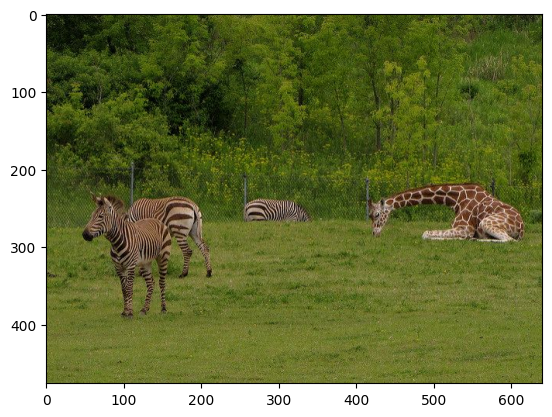

In [21]:
import os
image = cv2.imread("jungle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename('jungle.jpg')
filename,ext = file_name.split('.')

plt.imshow(image)

In [22]:
h,w = image.shape[:2]
# create 4D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)


In [24]:
blob.shape

(1, 3, 416, 416)

In [25]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [26]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [27]:
# Sets the blob as the input of the network
net.setInput(blob)
#get all the layer names
ln = net.getLayerNames()
try:
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
  # In case getUnconnectedOutLayers() return 1D array when CUDA isn't available

  ln  = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
#feed forward (inference) and get the network output
layer_outputs = net.forward(ln)

In [29]:
layer_outputs[0].shape

(507, 85)

In [37]:
layer_outputsfont_scale = 0.5
thickness = 2
boxes, confidences, class_ids = [], [], []

# loop over each of the layer outputs
for output in layer_outputs:

  # loop over each of the object detections
  for detection in output:
    # extract the class id(label) and confidence(as a probability) of
    # the current object detection
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    # discard out weak predictions by ensuring the detected
    # probability is greater than the minimum probability
    if confidence > CONFIDENCE:
      # scale the bounding box coordinates back relative to
      # the size of the image, keeping in mind that Yolo
      # acutally returns the center(x, y). Coordinates of the bounding box
      # followed by the boxes, width and height
      box = detection[0:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype("int")
      # use the center coordinates to derive the top and left
      # coordinates of the bounding box
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))
      # update our list of bounding box coordinates, confidences,
      # and class IDs
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [31]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [76, 235, 154, 121],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [102, 237, 108, 119],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [32]:
confidences

[0.6346844434738159,
 0.9911091923713684,
 0.8938906192779541,
 0.6215727925300598,
 0.9985881447792053,
 0.5608307123184204,
 0.7890708446502686,
 0.995597779750824,
 0.8802229762077332,
 0.8385530114173889,
 0.9966028928756714,
 0.5241893529891968,
 0.680671751499176,
 0.9988306760787964,
 0.700495183467865]

In [33]:
class_ids


[23, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]

In [39]:
labels[24], labels[23]

('giraffe', 'zebra')

In [80]:
# loop over the indexes we are keeping
for i in range(len(boxes)):
  # extracting the bounding box coordinates
  x, y = boxes[i][0], boxes[i][1]
  w, h = boxes[i][2], boxes[i][3]
  # draw a bounding box rectangle and label on the image
  color = [int(c) for c in colors[class_ids[i]]]
  cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness=2)
  # calculate text_width & height to draw the transpatent boxes as background of the text
  text = f'{(labels[class_ids[i]+1])} {confidences[i]:.2f}'
  (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.4, thickness=2)[0]
  text_offset_x = x
  text_offset_y = y - 5
  box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
  overlay = image.copy()
  cv2.rectangle(overlay, box_coords[0], box_coords[1], color, cv2.FILLED)
  # add opacity (transparency to he box)
  image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
  # now put the text(label: confidence %)
  cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_COMPLEX, fontScale=0.4, color=(0, 0, 0), thickness=1)

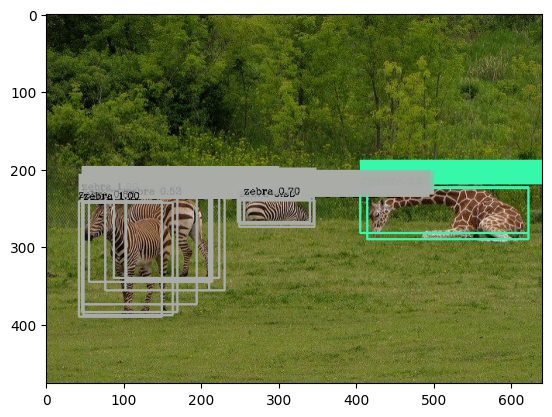

In [81]:
plt.imshow(image)

In [82]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [83]:
indexes

array([13,  7,  2,  0], dtype=int32)

In [84]:
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(labels[class_ids[i]+1])
    color = colors[class_ids[i]]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 0.5, (255, 255, 255), 2)

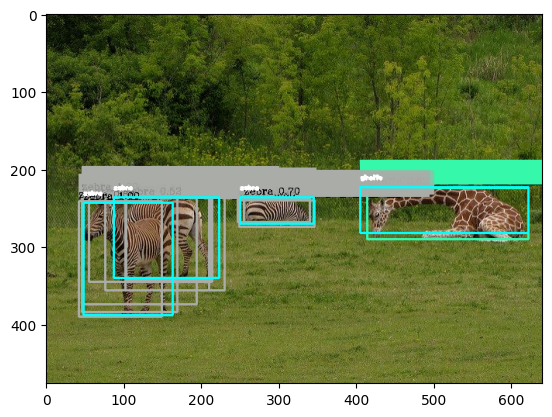

In [85]:
plt.imshow(image)